# Movie Recommendation System Using Machine Learning

Problem Statement:

You are a Data Scientist at XYZ Corporation. Their customers are asking for a movie recommender system. Your task is to build a movie recommender system out of an existing movie and user rating data. The system should be able to take users movie ratings as input and provide movie recommendation based on those ratings.

The system should be able to take users movie ratings as input and provide movie recommendation based on those ratings.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data given in both ratings and movies files
movies = pd.read_csv("D:\\Machine Learning\Project\\Movie Recommendation Project -2\\movies.csv")
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv("D:\\Machine Learning\\Project\\Movie Recommendation Project -2\\ratings.csv")
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Merge those datasets into one.
movie_ratings = pd.merge(movies, ratings, on="movieId")
movie_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [6]:
import datetime
from datetime import datetime, date
movie_ratings['datetime'] = pd.to_datetime(movie_ratings['timestamp'])

In [7]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  int64         
 6   datetime   100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [8]:
movie_ratings.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [9]:
movie_ratings.shape

(100836, 7)

In [10]:
# Check for number of missing of values in the dataset
movie_ratings.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
datetime     0
dtype: int64

In [11]:
# Check for duplicated values
movie_ratings.duplicated().sum()

0

# Extract column with useful information

In [12]:
movie_ratings.groupby('title')['rating'].mean().head(10)

title
'71 (2014)                                 4.000000
'Hellboy': The Seeds of Creation (2004)    4.000000
'Round Midnight (1986)                     3.500000
'Salem's Lot (2004)                        5.000000
'Til There Was You (1997)                  4.000000
'Tis the Season for Love (2015)            1.500000
'burbs, The (1989)                         3.176471
'night Mother (1986)                       3.000000
(500) Days of Summer (2009)                3.666667
*batteries not included (1987)             3.285714
Name: rating, dtype: float64

In [13]:
# Sort the movies based on ratings - To sort the movies by their average rating in descending order
# calculate the mean rating for each movie using the "rating" column and then sort the resulting Series in
# descending order based on their average rating
# The resulting series, named "sorted_movies" will contain the titles of the movies as the index and their average ratings
# as the values

sorted_ratings = movie_ratings.groupby('title')['rating'].mean().sort_values(ascending=False)
sorted_ratings.head(10)

title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64

In [14]:
# Count of people rated the movie

ratings_count = movie_ratings.groupby('title')['rating'].count().sort_values(ascending=False)
ratings_count.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [15]:
# Create a empty dataframe from that create mean rating dataframe

rating_mean_count = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean())

In [16]:
rating_mean_count

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [17]:
# Creating a new column 'Rating_counts' and add into existing dataframe

rating_mean_count['rating_counts'] = pd.DataFrame(movie_ratings.groupby('title')['rating'].count())

In [18]:
rating_mean_count.head(10)

,rating,rating_counts
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


# Generate a Pivot Table

In [19]:
# By specifying the 'index' and 'column parameters' in the pd.pivot_table() function, can determine which
# features should appear in the columns and rows
# Pivot_table() method of a pandas dataframe and is a powerful tool for reshaping data and can
# be used to summarize and aggregate data in various ways

pivot_table = movie_ratings.pivot_table(values='rating', columns='title', index='userId')
pivot_table

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


# Perform data cleaning by dropping users with less than 10 reviews.

In [20]:
ratings = ratings.groupby('userId').filter(lambda x: len(x) >= 10)
print(ratings.head(20))

    userId  movieId  rating  timestamp
0        1        1     4.0  964982703
1        1        3     4.0  964981247
2        1        6     4.0  964982224
3        1       47     5.0  964983815
4        1       50     5.0  964982931
5        1       70     3.0  964982400
6        1      101     5.0  964980868
7        1      110     4.0  964982176
8        1      151     5.0  964984041
9        1      157     5.0  964984100
10       1      163     5.0  964983650
11       1      216     5.0  964981208
12       1      223     3.0  964980985
13       1      231     5.0  964981179
14       1      235     4.0  964980908
15       1      260     5.0  964981680
16       1      296     3.0  964982967
17       1      316     3.0  964982310
18       1      333     5.0  964981179
19       1      349     4.0  964982563


# Create a correlation matrix

In [21]:
corr_matrix = pivot_table.corr()
corr_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Tis the Season for Love (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.997176,0.500000,...,NaN,NaN,NaN,NaN,NaN,-0.067522,NaN,NaN,-0.002732,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,0.997176,NaN,1.000000,0.944911,...,NaN,-0.866025,NaN,NaN,NaN,-0.388883,0.831858,1.0,0.572078,NaN


# Get user input by getting movie names and ratings from user.

In [22]:
movie_name = input("Enter the name of the movie: ")

movie_rating = input("Enter your rating for this movie (between 1.0 and 5.0): ")

movie_rating = float(movie_rating)

print("You rated '{}' a {} out of 5.0.".format(movie_name, movie_rating))

Enter the name of the movie: (500) Days of Summer (2009)
Enter your rating for this movie (between 1.0 and 5.0): 4.0
You rated '(500) Days of Summer (2009)' a 4.0 out of 5.0.


# Generate Recommendations based on user preferences and correlation matrix that the user provides.

In [23]:
# Create a dataframe for analysis

trend = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean())
trend['Total number of ratings'] = pd.DataFrame(movie_ratings.groupby('title')['rating'].count())
trend.head()

,rating,Total number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


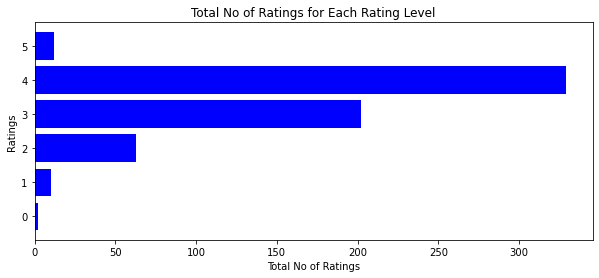

In [24]:
# Plot Rounded-up Ratings with Number of Movies with Horizontal Bar Chart

import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))
ax = plt.barh(trend['rating'].round(),trend['Total number of ratings'],color='blue')
plt.xlabel('Total No of Ratings')
plt.ylabel('Ratings')
plt.title('Total No of Ratings for Each Rating Level')
plt.show()

C:\Users\praka\AppData\Local\Temp\ipykernel_25580\947425656.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.head(25).index, rotation=40, fontsize='12', horizontalalignment="right")


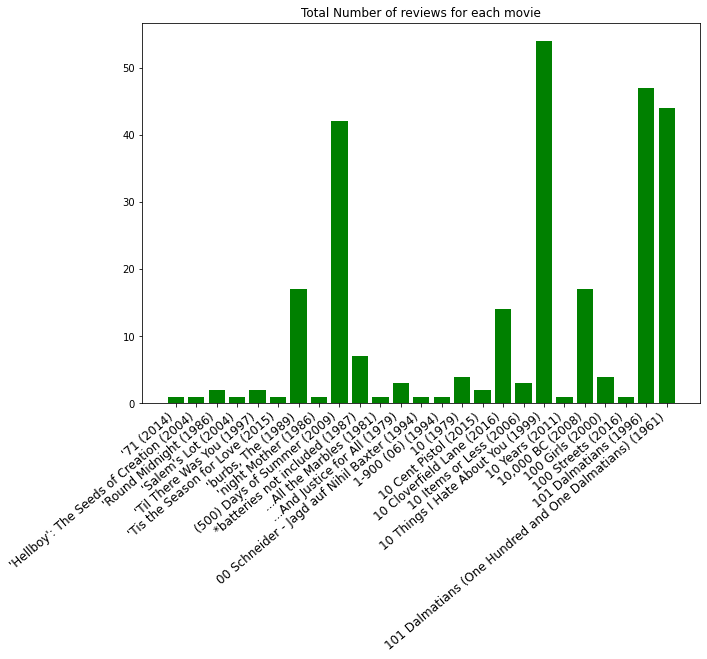

In [25]:
# A bar graph describing number of reviews for first 25 movies

plt.figure(figsize=(10,7))
ax=plt.subplot()
ax.bar(trend.head(25).index, trend['Total number of ratings'].head(25), color='green')
ax.set_xticklabels(trend.head(25).index, rotation=40, fontsize='12', horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

In [26]:
# Calculate 'mean' rating of all movies and check the 'Popular high rating movies'

movie_ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64

In [27]:
# List of 20 movies to recommend to a user who has liked 'Love and Pigeons (1985)'

print(pivot_table.corr()['(500) Days of Summer (2009)'].sort_values(ascending=False).iloc[:20])

title
White Christmas (1954)               1.0
Good Year, A (2006)                  1.0
Nightmare on Elm Street, A (1984)    1.0
Conspiracy Theory (1997)             1.0
Hunt for the Wilderpeople (2016)     1.0
Puss in Boots (2011)                 1.0
Blast from the Past (1999)           1.0
Warrior (2011)                       1.0
Out of Sight (1998)                  1.0
Let's Be Cops (2014)                 1.0
Punisher: War Zone (2008)            1.0
Quest, The (1996)                    1.0
Push (2009)                          1.0
Departures (Okuribito) (2008)        1.0
Derailed (2005)                      1.0
Purge: Anarchy, The (2014)           1.0
Red Rock West (1992)                 1.0
Punchline (1988)                     1.0
RV (2006)                            1.0
Pump Up the Volume (1990)            1.0
Name: (500) Days of Summer (2009), dtype: float64
